# Introduction to Statistical Learning 
Introduction to Statistical Learning by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani is considered a canonical text in the field of statistical/machine learning and is an absolutely fantastic way to move forward in your analytics career. [The text is free to download](http://www-bcf.usc.edu/~gareth/ISL/) and an [online course by the authors themselves](https://lagunita.stanford.edu/courses/HumanitiesSciences/StatLearning/Winter2016/about) is currently available in self-pace mode, meaning you can complete it any time. Make sure to **[REGISTER FOR THE STANDFORD COURSE!](https://lagunita.stanford.edu/courses/HumanitiesSciences/StatLearning/Winter2016/about)** The videos have also been [archived here on youtube](http://www.r-bloggers.com/in-depth-introduction-to-machine-learning-in-15-hours-of-expert-videos/).

# How will Houston Data Science cover the course?
The Stanford online course covers the entire book in 9 weeks and with the R programming language. The pace that we cover the book is yet to be determined as there are many unknown variables such as interest from members, availability of a venue and general level of skills of those participating. That said, a meeting once per week to discuss the current chapter or previous chapter solutions is the target.


# Python in place of R
Although R is a fantastic programming language and is the language that all the ISLR labs are written in, the Python programming language, except for rare exceptions, contains analgous libraries that contain the same statistical functionality as those in R.

# Notes, Exercises and Programming Assignments all in the Jupyter Notebok
ISLR has both end of chapter problems and programming assignments. All chapter problems and programming assignments will be answered in the notebook.

# Replicating Plots
The plots in ISLR are created in R. Many of them will be replicated here in the notebook when they appear in the text

# Book Data
The data from the books was downloaded using R. All the datasets are found in either the MASS or ISLR packages. They are now in the data directory. See below

In [1]:
!ls data

Advertising.csv college.csv     khan_xtrain.csv nci60_labs.csv  wage.csv
auto.csv        default.csv     khan_ytest.csv  portfolio.csv   weekly.csv
boston.csv      hitters.csv     khan_ytrain.csv smarket.csv
caravan.csv     khan_xtest.csv  nci60_data.csv  usarrests.csv


# Youtube videos in the notebook
If you don't feel like going to Stanford Online to watch the videos, you don't have to as all the Youtube videos can be embedded thanks to the Youtube iPython widget in the notebook.

In [2]:
from IPython.display import YouTubeVideo

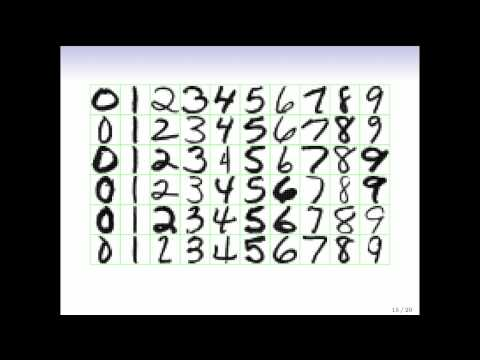

In [3]:
YouTubeVideo("2wLfFB_6SKI")

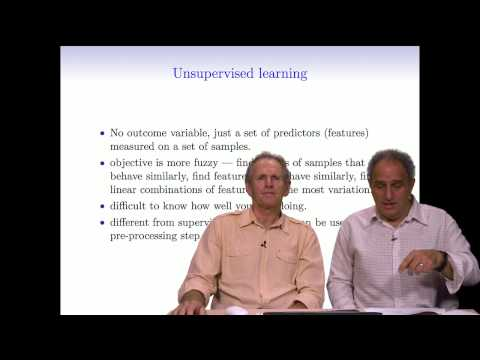

In [4]:
YouTubeVideo("LvaTokhYnDw")

# How to get the most out of the class
Simple, watch the videos and read the chapter before the start of each class and then finish all the assignments at home.

# ISLR Chapter 1
Chapter 1 is short and introduces some of the data, definitions on what is statistical learning, notation and book organization.

**Statistical learning** - understanding data

Two sets of tools  
**Supervised** - Model built to predict an output from a set of inputs  
**Unsupervised** - Learn underlying structure of data

# Wage data introduced
All data is in the data directory. This data was downloaded from the ISLR and MASS R packages

In [5]:
# Bring data into workspace and replicate plots
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df_wage = pd.read_csv('data/wage.csv')

In [7]:
df_wage = df_wage.drop(df_wage.columns[0], axis=1)

In [8]:
df_wage.head(10)

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154
5,2008,54,1. Male,2. Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.845098,127.115744
6,2009,44,1. Male,2. Married,4. Other,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.133021,169.528538
7,2008,30,1. Male,1. Never Married,3. Asian,3. Some College,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.716003,111.720849
8,2006,41,1. Male,1. Never Married,2. Black,3. Some College,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.778151,118.884359
9,2004,52,1. Male,2. Married,1. White,2. HS Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.857332,128.680488


In [9]:
df_wage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
year          3000 non-null int64
age           3000 non-null int64
sex           3000 non-null object
maritl        3000 non-null object
race          3000 non-null object
education     3000 non-null object
region        3000 non-null object
jobclass      3000 non-null object
health        3000 non-null object
health_ins    3000 non-null object
logwage       3000 non-null float64
wage          3000 non-null float64
dtypes: float64(2), int64(2), object(8)
memory usage: 281.3+ KB


In [10]:
df_wage.describe(include=['O'])

,sex,maritl,race,education,region,jobclass,health,health_ins
count,3000,3000,3000,3000,3000,3000,3000,3000
unique,1,5,4,5,1,2,2,2
top,1. Male,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes
freq,3000,2074,2480,971,3000,1544,2142,2083


In [11]:
# Look at all available plotting styles
plt.style.available

['ggplot',
 'seaborn-talk',
 'seaborn-muted',
 'bmh',
 'seaborn-poster',
 'grayscale',
 'seaborn-notebook',
 'seaborn-dark',
 'fivethirtyeight',
 'classic',
 'seaborn-paper',
 'seaborn-colorblind',
 'seaborn-white',
 'dark_background',
 'seaborn-pastel',
 'seaborn-whitegrid',
 'seaborn-darkgrid',
 'seaborn-bright',
 'seaborn-dark-palette',
 'seaborn-ticks',
 'seaborn-deep']

In [12]:
plt.style.use("ggplot")

In [13]:
# need to reshape data to plot correctly
df_edu = df_wage.pivot(columns='education', values='wage')

In [14]:
df_edu.head(15)

education,1. < HS Grad,2. HS Grad,3. Some College,4. College Grad,5. Advanced Degree
0,75.043154,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,70.476020,NaN
2,NaN,NaN,130.982177,NaN,NaN
3,NaN,NaN,NaN,154.685293,NaN
4,NaN,75.043154,NaN,NaN,NaN
5,NaN,NaN,NaN,127.115744,NaN
6,NaN,NaN,169.528538,NaN,NaN
7,NaN,NaN,111.720849,NaN,NaN
8,NaN,NaN,118.884359,NaN,NaN
9,NaN,128.680488,NaN,NaN,NaN


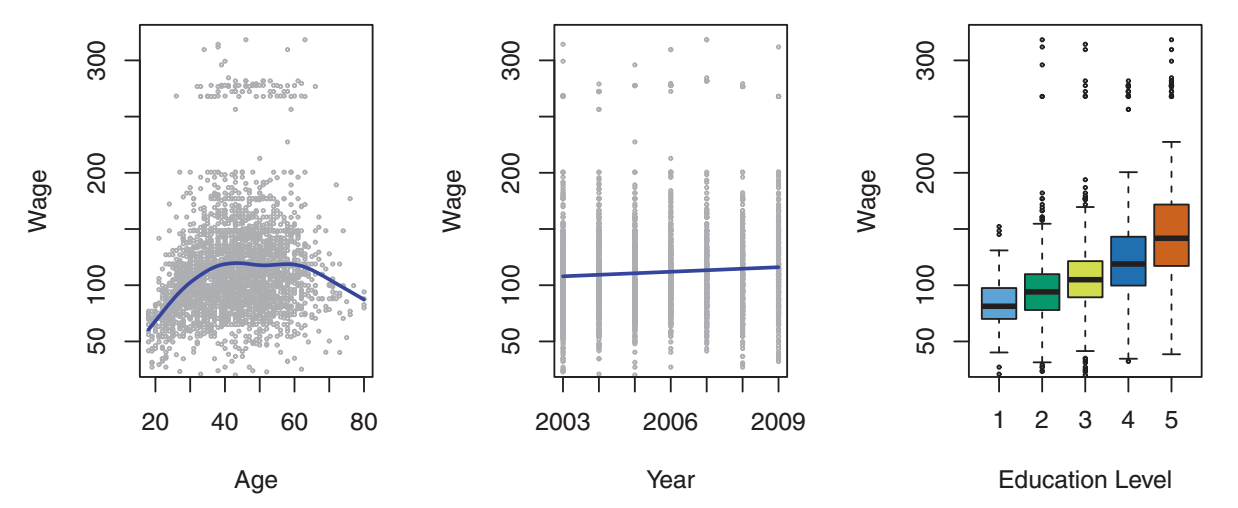

In [17]:
# Image from ISLR
from IPython.display import Image
Image('images/ch1_pg2.png')

# Replicate with matplotlib
Use statsmodels to fit lowess curve in first plot

In [18]:
# importing statsmodels library to fit lowess curve through data
import statsmodels.api as sm

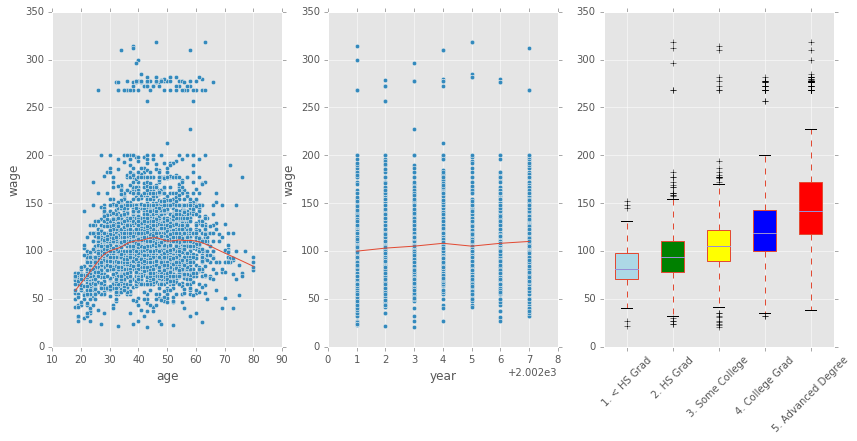

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))
df_wage.plot.scatter('age', 'wage', ax=ax[0])
lowess = sm.nonparametric.lowess(df_wage['wage'], df_wage['age'], frac=.2)
ax[0].plot(lowess[:, 0], lowess[:, 1])

df_wage.plot.scatter('year', 'wage', ax=ax[1])
year_median = df_wage.groupby('year')['wage'].median()
ax[1].plot(year_median)

boxplot = df_edu.plot.box(ax=ax[2], rot=45, patch_artist=True)
colors = ['lightblue', 'green', 'yellow', 'blue', 'red']
for artist, color in zip(boxplot.artists, colors):
    artist.set_facecolor(color)

# Seaborn for easy, beutiful plotting
[Check their intro page on how to use it](https://web.stanford.edu/~mwaskom/software/seaborn/)

In [20]:
import seaborn as sns

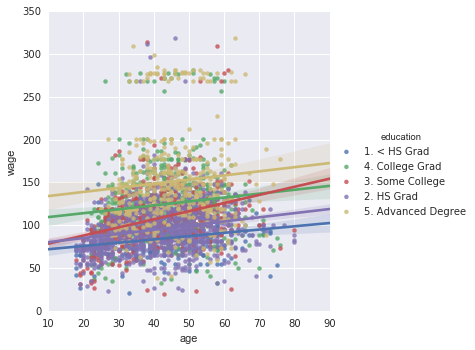

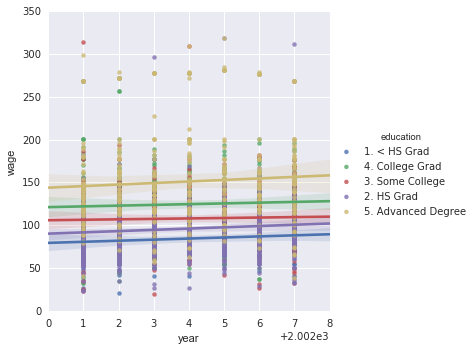

In [21]:
# Similar plots to those above
sns.lmplot('age', 'wage', data=df_wage, hue='education')
sns.lmplot('year', 'wage', data=df_wage, ci=99.99, hue='education');

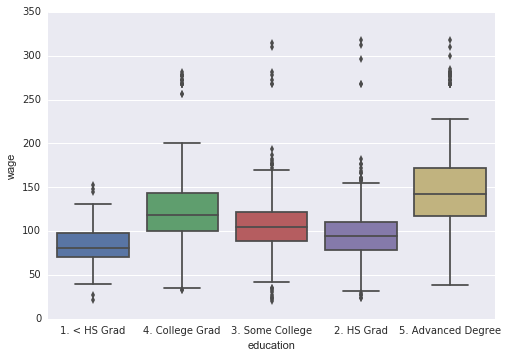

In [22]:
sns.boxplot('education', 'wage', data=df_wage);

In [23]:
df1 = df_wage[['age', 'year', 'education', 'wage']]

In [24]:
df_melt = pd.melt(df1, id_vars=['education', 'wage'])

In [25]:
df_melt.head()

,education,wage,variable,value
0,1. < HS Grad,75.043154,age,18
1,4. College Grad,70.476020,age,24
2,3. Some College,130.982177,age,45
3,4. College Grad,154.685293,age,43
4,2. HS Grad,75.043154,age,50


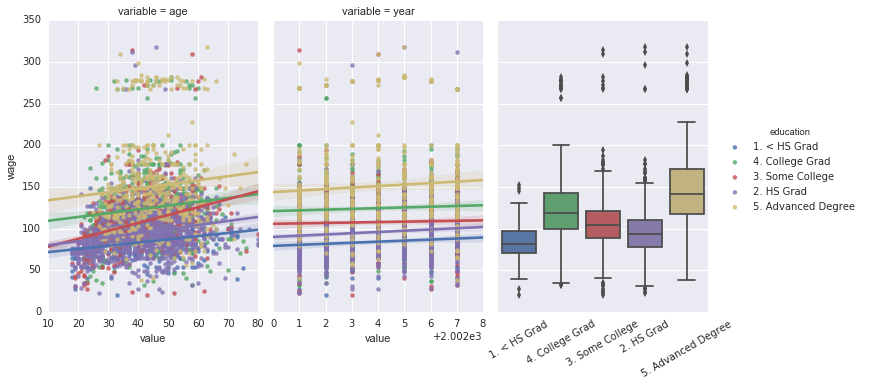

In [26]:
seaborn_grid = sns.lmplot('value', 'wage', col='variable', hue='education', data=df_melt, sharex=False)
seaborn_grid.fig.set_figwidth(8)

left, bottom, width, height = seaborn_grid.fig.axes[0]._position.bounds
left2, bottom2, width2, height2 = seaborn_grid.fig.axes[1]._position.bounds
left_diff = left2 - left
seaborn_grid.fig.add_axes((left2 + left_diff, bottom, width, height))

sns.boxplot('education', 'wage', data=df_wage, ax = seaborn_grid.fig.axes[2])
ax2 = seaborn_grid.fig.axes[2]
ax2.set_yticklabels([])
ax2.set_xticklabels(ax2.get_xmajorticklabels(), rotation=30)
ax2.set_ylabel('')
ax2.set_xlabel('');

leg = seaborn_grid.fig.legends[0]
leg.set_bbox_to_anchor([0, .1, 1.5,1])

# Regression vs Classification
The wage data above is an example of an output variable being continuous (any number). We call these regression problems. In the data below we explore the stock market data where the goal is to predict whether the stock market will go up or down the next day. The output variable here is categorical and these type of problems are referred to as classification problems.

In [27]:
df_smarket = pd.read_csv('data/smarket.csv', index_col=0)

In [28]:
df_smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [29]:
# Put all lags in one column. Make 'Tidy' Data
df_smarket_pivot = pd.melt(df_smarket, id_vars='Direction', value_vars=['Lag1', 'Lag2', 'Lag3'], 
                           var_name='Lag Type', value_name='Pct Change')

In [30]:
df_smarket_pivot.head()

,Direction,Lag Type,Pct Change
0,Up,Lag1,0.381
1,Up,Lag1,0.959
2,Down,Lag1,1.032
3,Up,Lag1,-0.623
4,Up,Lag1,0.614


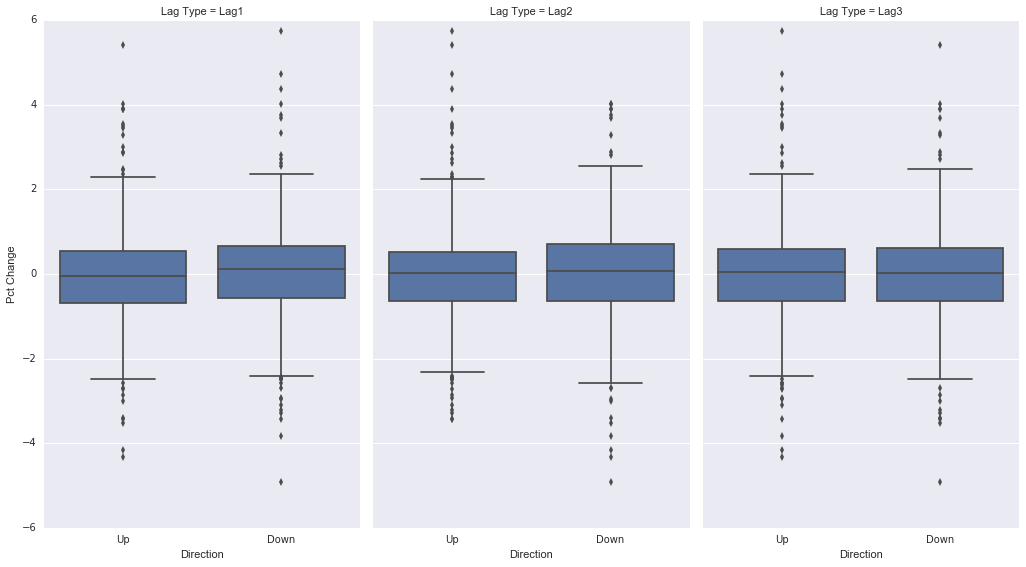

In [32]:
g = sns.FacetGrid(df_smarket_pivot, col="Lag Type", size=8, aspect=.6)
g = g.map(sns.boxplot, "Direction", "Pct Change")

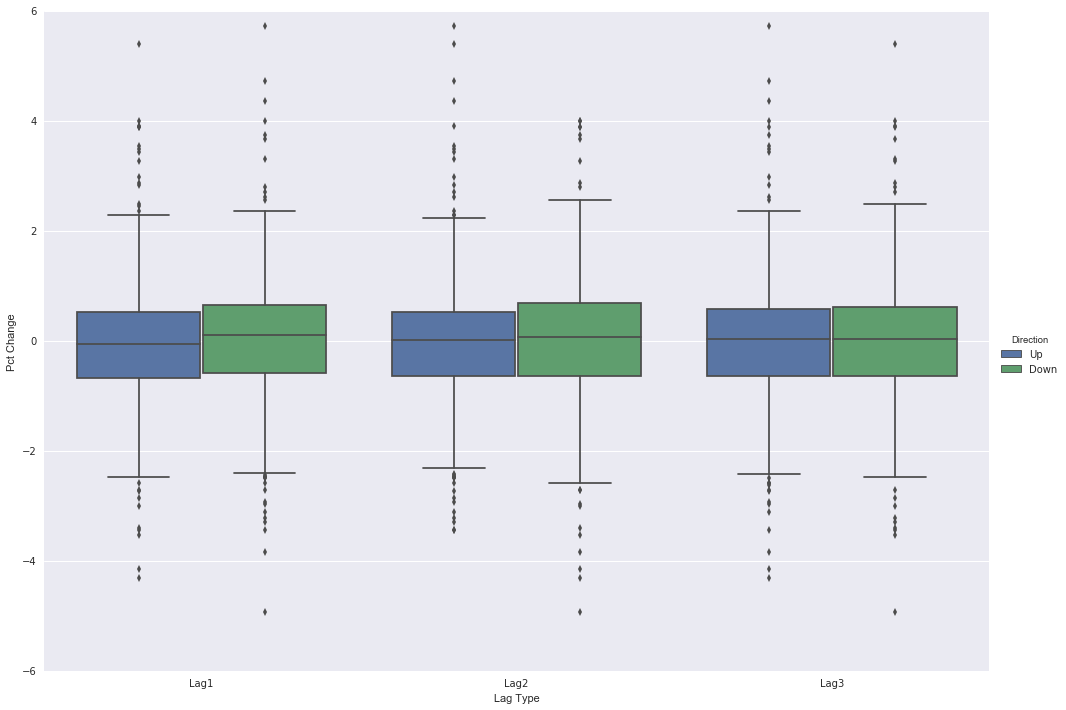

In [33]:
sns.factorplot("Lag Type", hue="Direction", y="Pct Change", data=df_smarket_pivot, kind="box", size=10, aspect=1.4)

# Clustering
No longer interested in prediction - looking to discover underlying similarities in the data

In [34]:
df_genes = pd.read_csv('data/nci60_data.csv', index_col=0)

In [35]:
df_genes.head()

,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
V1,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654981,...,-0.990019,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
V2,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285020,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
V3,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
V4,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350020,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
V5,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000


In [36]:
from sklearn.decomposition import PCA

In [37]:
pca = PCA(2)

In [38]:
df_genes_transformed = pd.DataFrame(pca.fit_transform(df_genes), columns=['PC1', 'PC2'])

In [39]:
from sklearn.cluster import KMeans

In [40]:
kmeans = KMeans(4)

In [41]:
kmeans.fit(df_genes_transformed)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=4, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [42]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 3,
       0, 3, 0, 0, 0, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [43]:
df_genes_transformed['cluster'] = kmeans.labels_

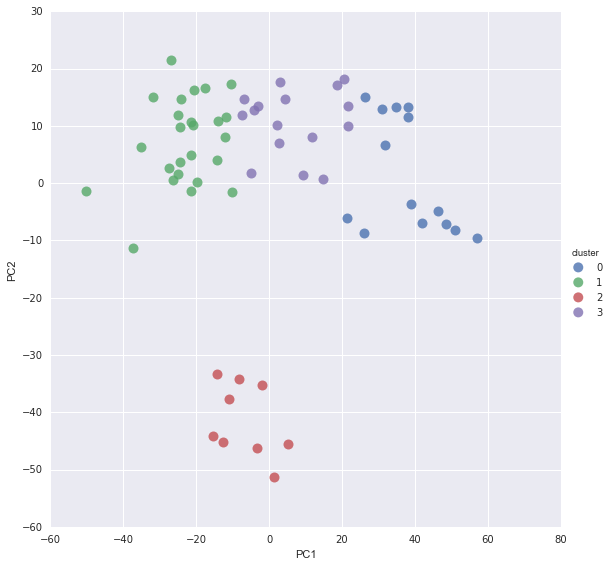

In [44]:
sns.lmplot('PC1', 'PC2', df_genes_transformed, fit_reg=False, hue='cluster', size=8, 
           scatter_kws={"marker": "D", "s": 100})

# History of Statistical Learning
* Early 18th Century - Gauss and Legendre independently discovering the method of least squares
* Sir Francis Galton - Regression to the mean (Tall Parents -> Less tall children), correlation. Cousin of Charles Darwin. Coined term Eugenicist. Discouraged low intelligence people from reproducing
* Karl Pearson - student of Galton. Father of mathematical statistics. Eugenicist and racist
* Ronald Fisher - father of modern stats and experimental design. ANOVA. Also Eugenicist and racist


Machine Learning Timeline
* 1940's: Linear discrimant analysis - First classification method developed by Fisher
* 1950's: Perecptrong and Neural Networks - Frank Rosenblatt
* 1960's: Nearest Neighbor, K-means clustering
* 1970's: Logistic regression
* 1980's: Decision Trees and other non-linear methods
* 1990's: Support Vector Machines(Vapnik)
* 2000's: Random Forest (Brieman), Deep Learning (Hinton)

# Elements of Statistical Learning
A book preceding ISLR by the same authors was one of the first to comprehensively cover machine learning. ESL is quite dense and for the advanced machine learning student. ISLR avoids the greusome math details and focuses on the most practical and widely used methods while using a non-threatening level of math for explanations.


# ISLR Premises
* Statistical Learning should not be a black box - Should know the use cases, the pros and cons of each method and how they are implemented

* Desire to solve real world problems - each programming assignment will have realistic use case

# Background Knowledge
* Basics of matrix algebra
* Basics of probability and statistics
* Specifically - linear regression

# Notation
* `n`- number of observations
* `p` - number of features (parameters)

# Chapter by Chapter
2: Basics of stat learning and K Nearest Neighbor  
3: Linear Regression  
4: Logistic Regression and Linear Discriminant Analysis  
5: Crossvalidation and bootstrapping  
6: Regression improvements - stepwise regression, regularized regression and others  
7: Non-linear methods - Polynomial regression, splines, general additive models  
8: Decision Trees and Random Forests - bagging/boosting  
9: Support Vector Machines  
10: Unsupervised Learning- Principal components analysis and clustering

# Chapter 2: Statistical Learning

## Advertising Data
The advertising data consists of product sales from 200 markets and their associated tv, radio, and newspaper advertising budgets. What kind of relationship can be seen between advertising budget and sales

In [46]:
df_adv = pd.read_csv('data/Advertising.csv', index_col=0)

In [47]:
df_adv_new = pd.melt(df_adv, value_vars=['TV', 'Radio', 'Newspaper'], id_vars='Sales', value_name='adv_budget')

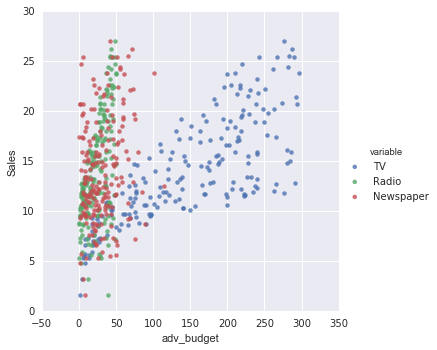

In [48]:
sns.lmplot('adv_budget', 'Sales', data=df_adv_new, hue='variable', fit_reg=False);

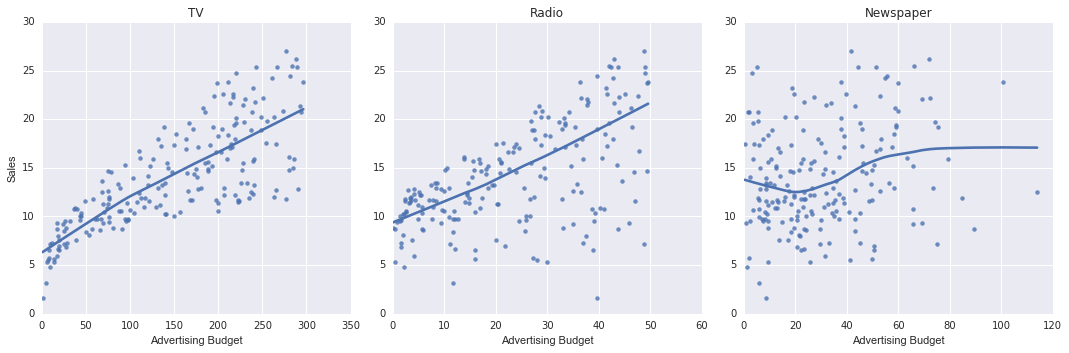

In [49]:
lm = sns.lmplot('adv_budget', 'Sales', data=df_adv_new, col='variable', sharey=False, sharex=False, lowess=True);
axes = lm.axes
for i, ax in enumerate(axes[0]):
    ax.set_xlim(0,)
    ax.set_title(lm.col_names[i])
    ax.set_xlabel('Advertising Budget')

## Variable Types
TV,radio and newspaper are input variables. Also known as features, predictors or independent veariable  
Sales is the output, target or response variable

## General form of linear model
We can quantify the relationship between input and output with the following linear model

$$y = f(X) + \epsilon$$

Where $X$ is the input matrix of predictors and $\epsilon$ is some random error. $f$ is some fixed but unknown systematic relation between $X$ and $Y$. Statistical learning is trying to approximate this function $f$

# Estimating $f$ for prediction and/or inference
**Prediciton**: Try to find a function $\hat{f}$ that closely matches $f$. Not that concerned about the shape or decipherability of $f$. Just want a good prediction for each input.

**Inference**: Want to understand the relationship between $X$ and $Y$. How does changing one parameter change the output. Finding only the important predictors. What type of model to use (linear vs non-linear)?

# Irreducible and Reducible Error
**Reducible Error** - This is the difference between $f$ and $\hat{f}$. In practice $f$ is never known so we will never be able to accurately measure this but this error can still be reduced by finding the best ML method to do the learning.

**Irreducible Error** - Even if you were to perfectly estimate $f$ you would still have error in your prediction as $f$ has inherent randomness in it.

The book focuses on minimizing the reducible error - finding that model $\hat{f}$ that closely matches $f$

## Parametric methods
* An assumption about the functional form is made $Y = \beta_0 + \beta_1X_1$ + ...
* Since mode form is linear, fitting is easier and usally fast
* Need to estimate parameters. Many ways to do this. Most popular is least squares
* Unlikely that the true form of $f$ is linear

## Flexible model
* Greater number of parameters
* Potential to overfit - memorizing data by following noise

## Nonparametric
* No functional form of $f$ is given. Meaning they can wiggle all over the place
* A very large number of parameters is needed.
* Fitting is more computationally intensive
* Potential to overfit

Trade-off between interpretability and flexibility. The more flexible a model is, the less-likely you are to be able to inerpret it. It becomes increasing more difficult to determine how the parameters are affecting the model the more flexible it is. Lasso regression is very inflexible as it forces some coefficients to 0

# Supervised vs Unsupervised Learning
**Supervised** - for every observation there is a corresponding response variable - fit a model

**Unsupervised** - No response variable for the observations - clustering

**Semi-supervised** - Some of the observations have responses - others don't. Not covered in book

**Reinforcement Learning** - Reward/Punishement for certain actions that are taken. Learns from this and repeats. Not in book

# Regression vs Classification Problems
Variables are classified as quantitative or qualitative  
**Quantitative** - Take on numerical values  
**Qualitative** - Take on categorical value  

Regression problems are those with quantitative responses  
Classificaiton problems are those with qualitative responses

Some confusion can arise. For instance, logistic regression is used for classification problems yet obviously has the term 'regression' in it. The reason this is so, is because logistic regression outputs probabilities that each observation is in a certain class. Probabilities are quantitative values between 0 and 1, and thus you have a 'regression'

Some algorithms such as K nearest neighbor, random forests, support vector machines can be used for both classification or regression purposes

# Assessing model accuracy
No one model works best - though some seem to think a grand unigying [master algorithm is on the way](https://www.amazon.com/Master-Algorithm-Ultimate-Learning-Machine/dp/0465065708).

## Measuring quality of fit
There are different ways to measure how well a supervised learning problem fit the data. For a classification problem we can simply find the percentage of observations that had the correct class predicted. For regression problems we could simply take the absolute value of the difference between the prediction and the actual ouput and take the average of this. $\sum{|f - \hat{f}|}/n$ 

### Mean squared error
Although the mean absolte error is a good intuitive metric, the standard is mean squared error(MSE). $$\sum{(f - \hat{f})^2}/n$$

Typical software regression implementations find the value of the parametrs that minimize the MSE. 

# Training Data vs Testing Data
**Training Data** - Data used to build a prediction model. Should not be used to validate the model.  
**Testing Data** - Data used to determine the usefullness of the model. Validates the model. This data is unseen during model building phase.

We want lowest test MSE. Don't care too much about training MSE.
During the training phase it's usually possible to fit a model that has no error. Such a model would be highly flexible and not fit well on new data is it simply memorized the noise/error. There is no guarantee that a model with low training MSE will have the same test MSE.

In [342]:
num_points = 30

In [436]:
x = np.linspace(1,13, num_points).reshape(-1, 1)
error = np.random.randn(num_points, 1) * 30
f = lambda x: (x - 2) * (x - 6) * (x - 12)

y = f(x) + error

In [346]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cross_validation import train_test_split

In [438]:
poly = PolynomialFeatures(degree=10)
X = poly.fit_transform(x)

In [453]:
obs_nums = np.arange(0, 30)
np.random.shuffle(obs_nums)

top_70 = int(num_points * .7)
rand_train = np.sort(obs_nums[:top_70])
rand_test = np.sort(obs_nums[top_70:])

In [468]:
X_train = X[rand_train]
X_test = X[rand_test]
y_train = y[rand_train]
y_test = y[rand_test]

In [527]:
linreg = LinearRegression()
linreg.fit(X_train[:, :2], y_train)
y_train_2 = linreg.predict(X_train[:, :2])
y_test_2 = linreg.predict(X_test[:, :2])

linreg.fit(X_train[:, :4], y_train)
y_train_4 = linreg.predict(X_train[:, :4])
y_test_4 = linreg.predict(X_test[:, :4])

linreg.fit(X_train, y_train)
y_train_10 = linreg.predict(X_train)
y_test_10 = linreg.predict(X_test)

In [528]:
errors_train= np.array([np.mean((y_train - y_train_2) ** 2),
                  np.mean((y_train - y_train_4) ** 2),
                  np.mean((y_train - y_train_10) ** 2)])
errors_train = np.column_stack(([2, 4, 10], errors_train))

errors_test = np.array([np.mean((y_test - y_test_2) ** 2),
                  np.mean((y_test - y_test_4) ** 2),
                  np.mean((y_test - y_test_10) ** 2)])
errors_test = np.column_stack(([2, 4, 10], errors_test))

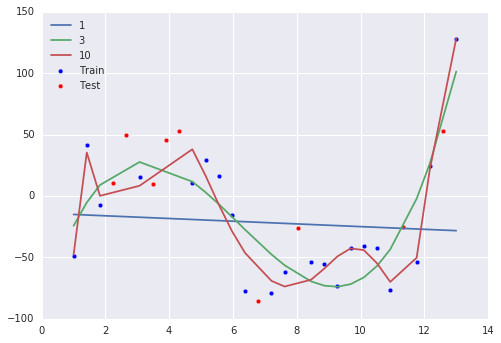

In [532]:
plt.scatter(X_train[:,1], y_train, c='b', label='Train')
plt.scatter(X_test[:,1], y_test, c='r', label = 'Test')
plt.plot(X_train[:,1], y_train_2, label = '1')
plt.plot(X_train[:,1], y_train_4, label = '3')
plt.plot(X_train[:,1], y_train_10, label = '10')
plt.legend(loc=2);

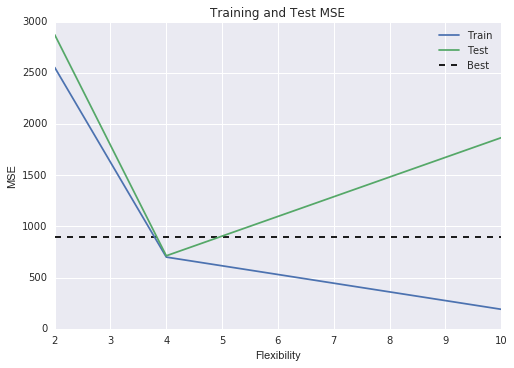

In [545]:
plt.plot(errors_train[:, 0], errors_train[:, 1], label = 'Train')
plt.plot(errors_test[:, 0], errors_test[:, 1], label = 'Test')
plt.hlines(900, 2, 10, label = 'Best', linestyle = '--')

plt.legend()
plt.title("Training and Test MSE")
plt.xlabel('Flexibility')
plt.ylabel('MSE');

## Problem (advanced)
<span style="color:green">Write a function that a takes a list/array of how many parameters to fit a linear regression model for the above data and outputs the two plots above.</span>

### Best possible MSE 
In theory this should be the var(random error). Or in this problem the variance of the normal distribution used which was 900.

In [546]:
# in reality
np.mean((y - f(x)) ** 2)

898.10344283641234

### Training MSE will always decrase with more flexibility
As a model has more access to features - i.e. is more flexible, it will be able to fit the data better, so no matter what, the training MSE will always decrease as more feature are added to the model

### Overfitting
When the test MSE of a more flexible model surpasses the test MSE of a lesser flexible model, overfitting is occurring. Random patterns are beginning to be picked up by the model.

# petrou.theodore@gmail.com

# https://houstondatascience.slack.com

# Tango12345

$$\epsilon_5$$